## Insight project: part 4
### ROC, Precision-recall curve on test data 

In [1]:
#apply logistic regression on training data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.externals import joblib
sns.set()

In [2]:
# #generate fake data
# data = np.random.uniform(0, 1, 125)
# data = (data > 0.75).astype(int)
# randon_tpr = []
# randon_fpr = []
# randon_precision = []
# for i in range(1, 1000):
#     pred = np.random.uniform(0, 1, 125)
#     pred = (pred > i / 1000).astype(int) 
#     tn, fp, fn, tp = confusion_matrix(data, pred).ravel()
#     randon_tpr.append(tp / (tp + fn))
#     randon_fpr.append(fp / (fp + tn))
#     randon_precision.append(tp / (tp + fp))

In [3]:
#read data, apply 80:20 split for train vs validation
train = pd.read_csv('data/train.csv', index_col=False)
test = pd.read_csv('data/test.csv', index_col=False)
print(train.shape, test.shape)
test.head()


(708, 4098) (126, 4098)


,Unnamed: 0,hits,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Butamben,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Doxofylline,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Oxyphenbutazone,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fosfosal,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dicyclomine hydrochloride,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#apply logistic regression on test data
lr = LogisticRegression(penalty='l1', C=5, tol=0.01, class_weight={1:3, 0:1})
lr.fit(train.iloc[:, 2:], train.iloc[:, 1])
lr_pred = lr.predict_proba(test.iloc[:, 2:])
lr_auc_score = roc_auc_score(test.iloc[:, 1], lr_pred[:, 1])
lr_fpr, lr_tpr, lr_roc_thresholds = roc_curve(test.iloc[:, 1], lr_pred[:, 1])
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(test.iloc[:, 1], lr_pred[:, 1])
#save the model to file
joblib.dump(lr, 'lr.pkl', compress=9)

print('auc_score: {}'.format(lr_auc_score))

# #plot auc curve
# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=1, wspace=0.2, hspace=0.2)
# plt.subplot(121)
# plt.xlabel("false positive rate")
# plt.ylabel("true positive rate")
# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)
# plt.plot(lr_fpr, lr_tpr, c='b', linewidth=2.0)
# #plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.2)
# #plot precision-recall curve
# plt.subplot(122)
# plt.xlabel("recall")
# plt.ylabel("precision")
# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)
# plt.plot(lr_recall, lr_precision, c='b', linewidth=2.0)
# #plt.scatter(randon_tpr, randon_precision, c='r', s=15, edgecolors='None', alpha=0.2)

auc_score: 0.7557767507998577


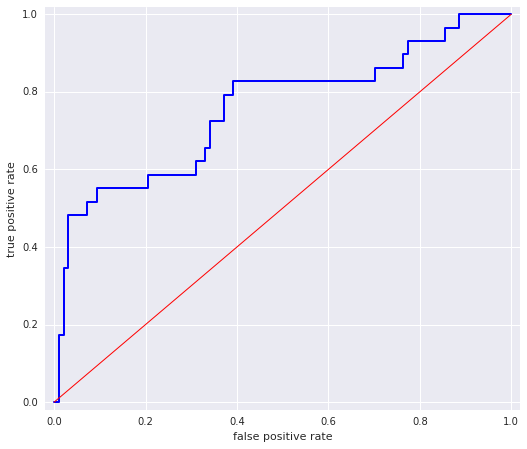

In [5]:
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.plot(lr_fpr, lr_tpr, c='b', linewidth=2.0)
plt.plot([0, 1], [0, 1], c='r', linewidth=1.0)
#plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.2)

In [6]:
#features used in the final prediction
lr.coef_[lr.coef_ != 0].shape

(416,)

auc_score: 0.7596871667259155


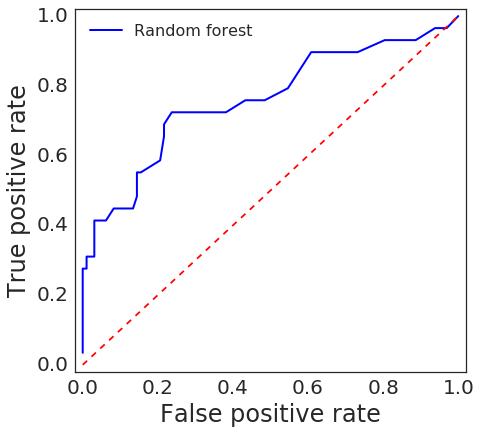

In [16]:
#random forest prediction
rf = RandomForestClassifier(n_estimators=60, criterion='gini', max_features='sqrt', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                oob_score=False, n_jobs=-1, random_state=6, verbose=0, warm_start=False,
                                class_weight={1:3, 0:1})
rf.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)
rf_pred = rf.predict_proba(test.iloc[:, 2:].values)
rf_auc_score = roc_auc_score(test.iloc[:, 1].values, rf_pred[:, 1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test.iloc[:, 1].values, rf_pred[:, 1])
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(test.iloc[:, 1], rf_pred[:, 1])
print('auc_score: {}'.format(rf_auc_score))

#save the model to file
joblib.dump(rf, 'rf.pkl', compress=9)

# #plot auc curve
# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
# plt.xlabel("false positive rate")
# plt.ylabel("true positive rate")
# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)
# plt.plot(rf_fpr, rf_tpr, c='b', linewidth=2.0)
# plt.plot([0, 1], [0, 1], c='r', linewidth=1.0)
# #plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.2)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(7, 6.5))
ax.plot(rf_fpr, rf_tpr, c='b', linewidth=2.0, label="Random forest")
ax.plot([0, 1], [0, 1], 'r--')
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.set_xlabel("False positive rate", fontsize=24)
ax.set_ylabel("True positive rate", fontsize=24)
ax.legend(loc="upper left", fontsize=16)

In [8]:
rf_pred[:5, :]
res = pd.DataFrame()
res["true label"] = test.iloc[:, 1]
res["probability"] = rf_pred[:, 1]
res.head()

,true label,probability
0,1,0.033333
1,0,0.100000
2,0,0.133333
3,0,0.083333
4,1,0.133333


(0, 1)

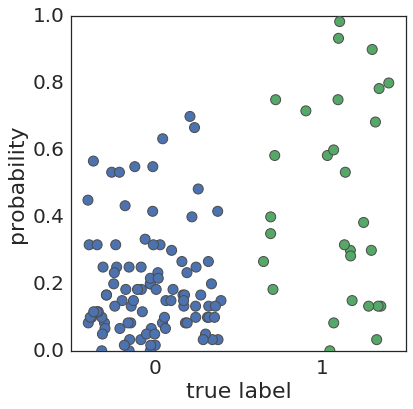

In [9]:
#plot the confusion matrix
sns.set(rc={"figure.figsize": (6, 6)})
sns.set_style("white")
sns.set_context("notebook", font_scale=2)
ax = sns.stripplot(x="true label", y="probability", data=res, jitter=0.4, size=10, linewidth=1)
ax.set_ylim((0, 1))



In [10]:
res['pred'] = (res['probability'] > 0.15) * 1
res.head()
tp = (res[(res['true label'] == 1) & (res['pred'] == 1)]).shape[0]
fp = (res[(res['true label'] == 0) & (res['pred'] == 1)]).shape[0]
tn = (res[(res['true label'] == 0) & (res['pred'] == 0)]).shape[0]
fn = (res[(res['true label'] == 1) & (res['pred'] == 0)]).shape[0]
accuracy =  (tp + tn) / (tp + tn + fn + fp)
sensitivity = tp / (tp + fn)
selectivity = 1 - fp/(tn + fp)
print(accuracy, sensitivity, selectivity)

0.5714285714285714 0.7586206896551724 0.5154639175257731


auc_score: 0.8229648062566655


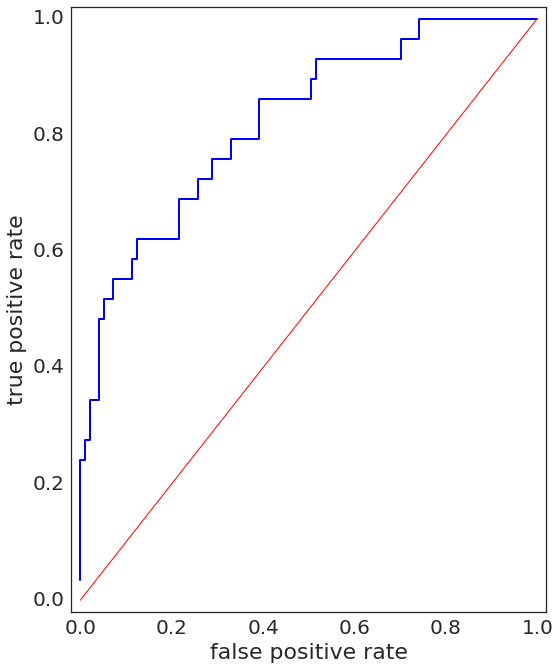

In [11]:
#support machine
model = SVC(C=6, probability=True, random_state=6, class_weight={1:3, 0:1})
model.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)
svm_pred = model.predict_proba(test.iloc[:, 2:].values)
svm_auc_score = roc_auc_score(test.iloc[:, 1].values, svm_pred[:, 1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(test.iloc[:, 1].values, svm_pred[:, 1])
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(test.iloc[:, 1], svm_pred[:, 1])
print('auc_score: {}'.format(svm_auc_score))

#save the model to file
joblib.dump(model, 'svm.pkl', compress=9)

#plot auc curve
#plot auc curve
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.plot(svm_fpr, svm_tpr, c='b', linewidth=2.0)
plt.plot([0, 1], [0, 1], c='r', linewidth=1.0)
#plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.2))

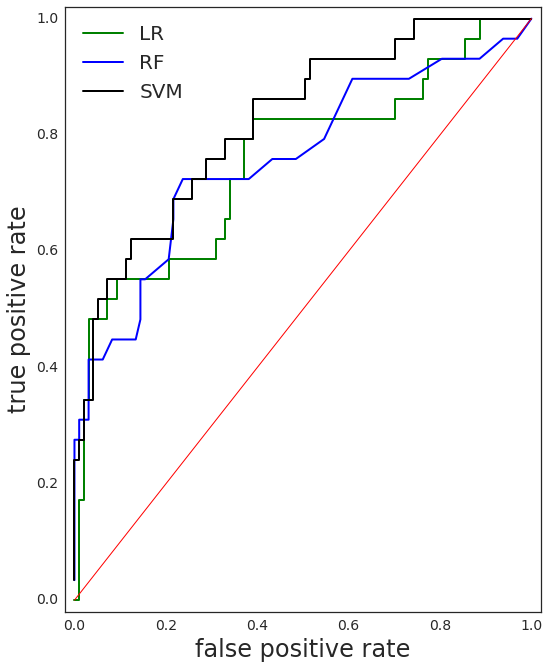

In [12]:
#plot all roc
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
plt.xlabel("false positive rate", fontsize=24)
plt.ylabel("true positive rate", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.plot(lr_fpr, lr_tpr, c='g', linewidth=2.0, label="LR")
plt.plot(rf_fpr, rf_tpr, c='b', linewidth=2.0, label="RF")
plt.plot(svm_fpr, svm_tpr, c='k', linewidth=2.0, label="SVM")
plt.plot([0, 1], [0, 1], c='r', linewidth=1.0)
#plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.2)
plt.legend(loc="upper left", frameon=False, fontsize=20)

In [13]:
# #plot all precision recall
# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
# plt.xlabel("recall", fontsize=20)
# plt.ylabel("precision", fontsize=20)
# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)
# plt.plot(lr_recall, lr_precision, c='k', linewidth=2.0, label="Logistic Regression")
# plt.plot(rf_recall, rf_precision, c='g', linewidth=2.0, label="Random Forest")
# plt.plot(svm_recall, svm_precision, c='gold', linewidth=2.0, label="Support Vector Machine")
# plt.scatter(randon_tpr, randon_precision, c='r', s=15, edgecolors='None', alpha=0.5)
# plt.legend(loc="upper right", frameon=False)

In [14]:
# #plot all roc

# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
# plt.xlabel("false positive rate", fontsize=24)
# plt.ylabel("true positive rate", fontsize=24)
# plt.xlim(-0.02, 1.02)
# plt.ylim(-0.02, 1.02)
# #plt.plot(lr_fpr, lr_tpr, c='g', linewidth=2.0, label="Logistic Regression")
# plt.plot(rf_fpr, rf_tpr, c='b', linewidth=2.0, label="Random Forest")
# #plt.plot(svm_fpr, svm_tpr, c='k', linewidth=2.0, label="Support Vector Machine")
# plt.plot([0, 1], [0, 1], c='r', linewidth=1.0)
# #plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.2)
# plt.legend(loc="upper left", frameon=False, fontsize=20)

In [15]:
#random forest predictiontotal = pd.read_csv('data/fingerprinters.csv')
total = pd.read_csv('data/fingerprinters.csv')
rf = RandomForestClassifier(n_estimators=60, criterion='gini', max_features='sqrt', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                oob_score=False, n_jobs=-1, random_state=6, verbose=0, warm_start=False,
                                class_weight={1:3, 0:1})
rf.fit(total.iloc[:, 2:].values, total.iloc[:, 1].values)
#save the model to file
joblib.dump(rf, 'model.pkl', compress=9)

['model.pkl']